In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation

In [2]:
# define all functions I use here
def extractContour(frame):
    mask = cv2.inRange(frame, 150, 255) # pick the brightest spot on the screen
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    _, contours,hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    
    # procede only if we find any contours and if the area is bigger than 0
    if (len(contours) >= 1) & np.any(areas): 
        # Find the index of the largest contour
        max_index = np.argmax(areas)
        cnt=contours[max_index]
        
        contour = cv2.convexHull(cnt)
        M_hull= cv2.moments(contour)
        centroid = (int(M_hull["m10"] / M_hull["m00"]), int(M_hull["m01"] / M_hull["m00"]))
    # else return and empty contour
    else:
        contour = ()
        centroid = (np.nan, np.nan)
    return(contour, centroid)

# load your video here

In [3]:
path = "./Example3_clipped.mp4"

cam = cv2.VideoCapture(path)
length = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cam.get(cv2.CAP_PROP_FPS)

print(length, width, height, fps)

121 1280 720 30.0


In [4]:
# extract all frame to create a background frame
imgs = []
for ff in range(length):
    cam.set(1,ff)
    ret, f = cam.read(1)
    img = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    imgs.append(img)
#     print(ret)

In [5]:
imgs_array = np.asarray(imgs)
imgs_array.shape

(121, 720, 1280)

# Calculate median to create background image

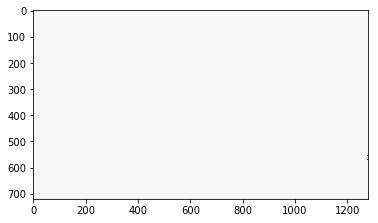

In [6]:
median_blank=np.median(imgs_array, axis=0)
plt.imshow(median_blank, cmap = 'gray')

# Subtract the background from all images

In [7]:
Subtracted_imgs = abs(imgs_array - median_blank) 
# used absolute because it was a light background with dark object (I inverted the range)

(array([  9.10095000e+05,   9.60000000e+01,   5.70000000e+01,
          6.10000000e+01,   5.50000000e+01,   5.10000000e+01,
          7.50000000e+01,   8.30000000e+01,   9.50000000e+01,
          1.09320000e+04]),
 array([   0. ,   24.8,   49.6,   74.4,   99.2,  124. ,  148.8,  173.6,
         198.4,  223.2,  248. ]),
 <a list of 10 Patch objects>)

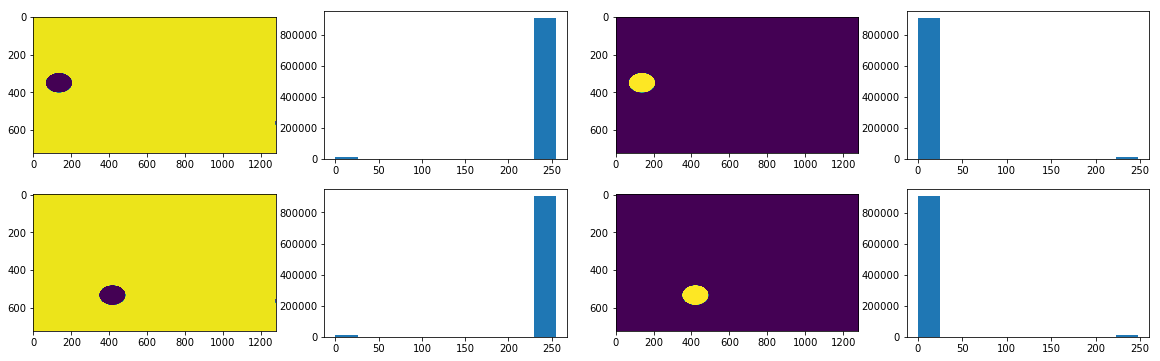

In [8]:
fig, ax = plt.subplots(2,4, figsize = (20,6))

ax[0,0].imshow(imgs_array[1])
ax[0,1].hist(imgs_array[1].ravel())
ax[0,2].imshow(Subtracted_imgs[1])
ax[0,3].hist(Subtracted_imgs[1].ravel())

ax[1,0].imshow(imgs_array[100])
ax[1,1].hist(imgs_array[100].ravel())
ax[1,2].imshow(Subtracted_imgs[100])
ax[1,3].hist(Subtracted_imgs[100].ravel())

# extract all the contour and detect brightest object

In [9]:
contour = []
centroid = []
for frames in Subtracted_imgs:
    cont, cent =extractContour(frames)
    contour.append(cont)
    centroid.append(cent)

# draw the center and contour for each image

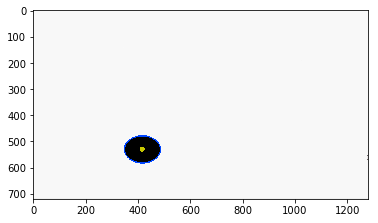

In [10]:
ff=[]
for frame in range(len(imgs_array)):
    cam.set(1,frame)
    ret, f = cam.read(1)
    img = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    cv2.drawContours(f,[contour[frame]],0,(0,69,255),4)
    cv2.circle(f, centroid[frame], 10, (200,200,0), -1)
    ff.append(f)

frame = 100
plt.imshow(ff[frame])

# Define the codec and create VideoWriter object
you will have to pick the codec and compression on the window that opens up

In [14]:
out = cv2.VideoWriter('Example3_output.avi', -1, 20.0, (width,height))

for frame in ff:
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
# Release everything if job is finished
out.release()
cv2.destroyAllWindows()